Devemos prever os valores da coluna Personal_loan e fazer as metricas adequadas

In [1]:
import pandas as pd
import matplotlib as plt

#Conhecendo o dataset

In [2]:
df = pd.read_excel('/content/drive/MyDrive/Colab Notebooks/Classificação/Metricas/Bank_Personal_Loan_Modelling.xlsx')

In [3]:
df.head()

,ID,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard
0,1,25,1,49,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,4,1.0,2,0,0,0,0,0,1


In [4]:
df.info()
# Visto que o dataset está sem variáveis do tipo object e tb sem vazios

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   Family              5000 non-null   int64  
 5   CCAvg               5000 non-null   float64
 6   Education           5000 non-null   int64  
 7   Mortgage            5000 non-null   int64  
 8   Personal_Loan       5000 non-null   int64  
 9   Securities_Account  5000 non-null   int64  
 10  CD_Account          5000 non-null   int64  
 11  Online              5000 non-null   int64  
 12  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(12)
memory usage: 507.9 KB


In [5]:
df.describe()

,ID,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000
mean,2500.500000,45.338400,20.104600,73.774200,2.396400,1.937913,1.881000,56.498800,0.096000,0.104400,0.06040,0.596800,0.294000
std,1443.520003,11.463166,11.467954,46.033729,1.147663,1.747666,0.839869,101.713802,0.294621,0.305809,0.23825,0.490589,0.455637
min,1.000000,23.000000,-3.000000,8.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,1250.750000,35.000000,10.000000,39.000000,1.000000,0.700000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
50%,2500.500000,45.000000,20.000000,64.000000,2.000000,1.500000,2.000000,0.000000,0.000000,0.000000,0.00000,1.000000,0.000000
75%,3750.250000,55.000000,30.000000,98.000000,3.000000,2.500000,3.000000,101.000000,0.000000,0.000000,0.00000,1.000000,1.000000
max,5000.000000,67.000000,43.000000,224.000000,4.000000,10.000000,3.000000,635.000000,1.000000,1.000000,1.00000,1.000000,1.000000


# Iniciando a Analise

In [6]:
from sklearn.model_selection import train_test_split

In [8]:
# Separando as colunas
x = df.copy()
x.drop(labels=['Personal_Loan', 'ID'], axis=1, inplace= True)
x.head()

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Securities_Account,CD_Account,Online,CreditCard
0,25,1,49,4,1.6,1,0,1,0,0,0
1,45,19,34,3,1.5,1,0,1,0,0,0
2,39,15,11,1,1.0,1,0,0,0,0,0
3,35,9,100,1,2.7,2,0,0,0,0,0
4,35,8,45,4,1.0,2,0,0,0,0,1


In [9]:
y = df[['Personal_Loan']]
y.head()

,Personal_Loan
0,0
1,0
2,0
3,0
4,0


In [10]:
from ast import Mod
from sklearn.linear_model import LogisticRegression

# Treinando o modelo
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, stratify=y)

lr = LogisticRegression()
lr.fit(x_train, y_train)
model= lr.predict(x_test)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [11]:
x_test.assign(Personal_Loan = y_test).assign(previsto = model)
# Aqui temos uma previsão usando o modo logistico e aparentemente está muito parecido

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Securities_Account,CD_Account,Online,CreditCard,Personal_Loan,previsto
3923,41,15,91,1,2.8,3,330,1,0,1,0,0,0
4541,62,38,124,1,3.8,1,405,0,0,1,0,0,0
1746,62,36,25,3,0.3,3,0,0,0,1,1,0,0
1691,56,32,48,1,1.6,3,0,0,0,0,1,0,0
1374,59,34,84,3,1.6,3,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1679,57,31,114,4,5.2,1,0,1,1,1,0,1,0
4776,47,23,40,2,2.1,3,156,0,0,1,0,0,0
1452,54,28,52,4,2.5,1,0,0,0,1,0,0,0
2634,34,9,75,1,2.8,1,194,0,0,0,0,0,0


# Metrificando

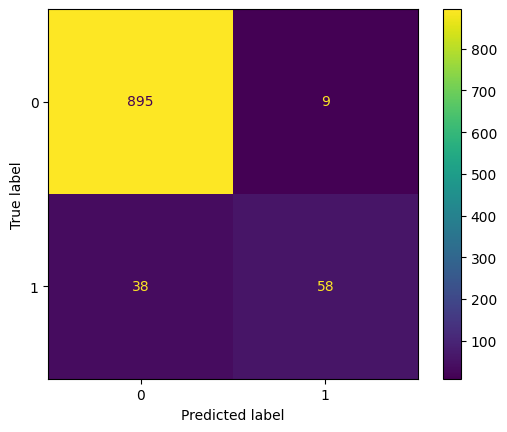

In [12]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm =  confusion_matrix(y_test, model, labels=lr.classes_)
cm =  confusion_matrix(y_test, model, labels=lr.classes_)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=lr.classes_)

disp.plot()
# Temos que os acertos foram muitos elevados e os erros não foram tão significativos

In [13]:
from sklearn.metrics import accuracy_score, balanced_accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

In [14]:
print(f'Acurácia de treino: {accuracy_score(y_train, lr.predict(x_train))}')
print(f'Acurácia de teste: {accuracy_score(y_test, lr.predict(x_test))} \n\n')


print(f'Balanciamento de treino: {balanced_accuracy_score(y_train, lr.predict(x_train))}')
print(f'Balanciamento de teste: {balanced_accuracy_score(y_test, lr.predict(x_test))} \n\n')


print(f'Precisão Treino: {precision_score(y_train, lr.predict(x_train))}')
print(f'Precisão Test: {precision_score(y_test, lr.predict(x_test))}')
print('============================================================= \n')


print(f'Recall de treino: {recall_score(y_train, lr.predict(x_train))}')
print(f'Recall de teste: {recall_score(y_test, lr.predict(x_test))} \n\n')

print(f'f1_score de treino: {f1_score(y_train, lr.predict(x_train))}')
print(f'f1_score de teste: {f1_score(y_test, lr.predict(x_test))} \n\n')


print(f'Roc de treino: {roc_auc_score(y_train, lr.predict_proba(x_train)[:,1])}')
print(f'Roc de teste: {roc_auc_score(y_test, lr.predict_proba(x_test)[:,1])} \n\n')

Acurácia de treino: 0.946
Acurácia de teste: 0.953 


Balanciamento de treino: 0.7862509218289085
Balanciamento de teste: 0.7971054572271385 


Precisão Treino: 0.795774647887324
Precisão Test: 0.8656716417910447

Recall de treino: 0.5885416666666666
Recall de teste: 0.6041666666666666 


f1_score de treino: 0.6766467065868264
f1_score de teste: 0.7116564417177914 


Roc de treino: 0.9489162748893805
Roc de teste: 0.9410836098820058 




plotando melhor o problema

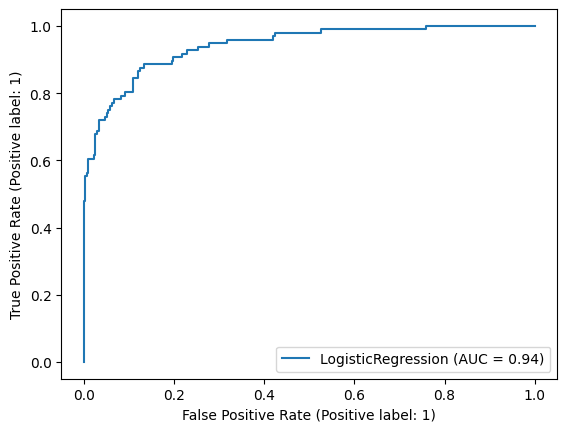

In [15]:
from sklearn.metrics import RocCurveDisplay

curva_disp = RocCurveDisplay.from_estimator(lr, x_test, y_test)

# Um Auc muito bom de 0.94

In [16]:
# Ultimo plot que mostra todos os dados finais e metricas

metricas = {
    'model': ['Logistic Regression', 'Logistic Regression'],
    'modo': ['treino', 'teste'],
    'accuracy': [accuracy_score(y_train, lr.predict(x_train)), accuracy_score(y_test, lr.predict(x_test))],
    'balanced_accuracy': [balanced_accuracy_score(y_train, lr.predict(x_train)), balanced_accuracy_score(y_test, lr.predict(x_test))],
    'precision': [precision_score(y_train, lr.predict(x_train)), precision_score(y_test, lr.predict(x_test))],
    'recall': [recall_score(y_train, lr.predict(x_train)), recall_score(y_test, lr.predict(x_test))],
    'f1_score': [f1_score(y_train, lr.predict(x_train)), f1_score(y_test, lr.predict(x_test))],
    'rocauc': [roc_auc_score(y_train, lr.predict_proba(x_train)[:,1]), roc_auc_score(y_test, lr.predict_proba(x_test)[:,1])]

}

pd.DataFrame(metricas)

,model,modo,accuracy,balanced_accuracy,precision,recall,f1_score,rocauc
0,Logistic Regression,treino,0.946,0.786251,0.795775,0.588542,0.676647,0.948916
1,Logistic Regression,teste,0.953,0.797105,0.865672,0.604167,0.711656,0.941084
